## House Prices - Advanced Regression Techniques

* This notebook explores the House Prices dataset and builds a predictive model for house sale prices in Ames, Iowa.

* Goal: 

	- Predict the final sale price of homes based on the most important features describing various aspects of residential properties.

* Evaluation Metric: 

	- Root Mean Squared Error (RMSE) between the logarithm of predicted and actual sale prices.

Summary

Data Loading & Initial Exploration
Exploratory Data Analysis (EDA)
Feature Engineering & Data Preparation
Machine Learning Modeling
Comparing models' performance and training the best
Creating python scripts from notebook
Local model deployment with Flask
Local model deployment with Docker
Cloud model deployment with AWS Elastic Beanstalk
Conclusions & Next Steps


1. Data Loading & Initial Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error

%matplotlib inline

In [2]:
# Read the two CSV files
df1 = pd.read_csv('test.csv')
df2 = pd.read_csv('train.csv')

# Use concat to join DataFrames vertically, `ignore_index=True` resets the index of the new DataFrame
dfx = pd.concat([df1, df2], ignore_index=True)

dfx.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


In [3]:
df = dfx.copy()

the length of the dataset is:

In [4]:
len(df)

2919

In [5]:
df.columns.size

81

the shape is:

In [6]:
df.shape

(2919, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

the sum of datatypes are

In [8]:
df.dtypes.value_counts()

object     43
int64      26
float64    12
Name: count, dtype: int64

looking for nulls and NaN values:

In [9]:
df[df.isna().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000.0
2915,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000.0
2916,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500.0
2917,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125.0


Integer data types do not have null values.

In [10]:
df[df.dtypes[df.dtypes=='int64'].index].isna().sum().sort_values(ascending=False)

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

- SalePrice has the highest number of null values, almost half of all rows!!, followed by LotFrontage, GarageYrBlt, etc, of the float datatype

In [11]:
df[df.dtypes[df.dtypes=='float64'].index].isna().sum().sort_values(ascending=False)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
BsmtUnfSF          1
TotalBsmtSF        1
GarageCars         1
GarageArea         1
dtype: int64

PoolQC has the highest number of null values, followed by MiscFeature, Alley, Fence, MasVnrType, FireplaceQu, etc., of the Object data type.

In [12]:
df[df.dtypes[df.dtypes=='object'].index].isna().sum().sort_values(ascending=False)

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
MasVnrType       1766
FireplaceQu      1420
GarageCond        159
GarageQual        159
GarageFinish      159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MSZoning            4
Utilities           2
Functional          2
Exterior2nd         1
Exterior1st         1
SaleType            1
KitchenQual         1
Electrical          1
LotConfig           0
LandContour         0
LotShape            0
Street              0
Condition2          0
Condition1          0
Neighborhood        0
LandSlope           0
RoofMatl            0
RoofStyle           0
HouseStyle          0
ExterQual           0
Heating             0
ExterCond           0
Foundation          0
BldgType            0
CentralAir          0
HeatingQC           0
PavedDrive          0
SaleCondition       0
dtype: int64

* Total of NaN/Nulls values

In [13]:
df.isnull().sum().sum()

np.int64(17166)

- This is a machine learning project for beginners, so...

- will select the most important numerical features to simplify (drop columns with low SalePrice correlations < 0.20)
- drop rows in where SalePrice has NaN values (SalePrice has almost a half of rows with NaN values)
- will drop columns with more than 60% NaNs values
- will round float values to 3 decimal places
- will not address outliers in this presentation

- will select the most important numerical features to simplify

In [14]:
# Select numerical features with good correlation to SalePrice (> 0.30)
# Based on the correlation analysis from previous cells

# Get correlation with SalePrice for numerical features
numerical_corr = df.select_dtypes(include=['int64', 'float64']).corr()['SalePrice'].sort_values(ascending=False)

# Select features with correlation > 0.30 (excluding SalePrice itself)
important_features = numerical_corr[numerical_corr.abs() > 0.20].drop('SalePrice').index.tolist()

# Create a new dataframe with selected features plus SalePrice
df_selected = df[['Id'] + important_features + ['SalePrice']].copy()

print(f"Selected {len(important_features)} important numerical features:")
print(important_features)
print(f"\nNew dataframe shape: {df_selected.shape}")
df_selected.head()

Selected 22 important numerical features:
['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BsmtUnfSF']

New dataframe shape: (2919, 24)


,Id,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,SalePrice
0,1461,5,896,1.0,730.0,882.0,896,1,5,1961,...,468.0,80.0,140,0,0,0,11622,0.0,270.0,NaN
1,1462,6,1329,1.0,312.0,1329.0,1329,1,6,1958,...,923.0,81.0,393,0,36,1,14267,0.0,406.0,NaN
2,1463,5,1629,2.0,482.0,928.0,928,2,6,1997,...,791.0,74.0,212,701,34,1,13830,0.0,137.0,NaN
3,1464,6,1604,2.0,470.0,926.0,926,2,7,1998,...,602.0,78.0,360,678,36,1,9978,0.0,324.0,NaN
4,1465,8,1280,2.0,506.0,1280.0,1280,2,5,1992,...,263.0,43.0,0,0,82,0,5005,0.0,1017.0,NaN


- verifying de new dataset

In [15]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   OverallQual   2919 non-null   int64  
 2   GrLivArea     2919 non-null   int64  
 3   GarageCars    2918 non-null   float64
 4   GarageArea    2918 non-null   float64
 5   TotalBsmtSF   2918 non-null   float64
 6   1stFlrSF      2919 non-null   int64  
 7   FullBath      2919 non-null   int64  
 8   TotRmsAbvGrd  2919 non-null   int64  
 9   YearBuilt     2919 non-null   int64  
 10  YearRemodAdd  2919 non-null   int64  
 11  GarageYrBlt   2760 non-null   float64
 12  MasVnrArea    2896 non-null   float64
 13  Fireplaces    2919 non-null   int64  
 14  BsmtFinSF1    2918 non-null   float64
 15  LotFrontage   2433 non-null   float64
 16  WoodDeckSF    2919 non-null   int64  
 17  2ndFlrSF      2919 non-null   int64  
 18  OpenPorchSF   2919 non-null 

- drop rows in df_selected where SalePrice has NaN values

In [16]:
# Drop rows where SalePrice has NaN values
df_selected = df_selected.dropna(subset=['SalePrice'])

print(f"✓ Rows with NaN SalePrice dropped")
print(f"✓ New dataframe shape: {df_selected.shape}")
print(f"✓ SalePrice NaN values remaining: {df_selected['SalePrice'].isnull().sum()}")
print(f"\nDataframe info:")
df_selected.info()

✓ Rows with NaN SalePrice dropped
✓ New dataframe shape: (1460, 24)
✓ SalePrice NaN values remaining: 0

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1459 to 2918
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageCars    1460 non-null   float64
 4   GarageArea    1460 non-null   float64
 5   TotalBsmtSF   1460 non-null   float64
 6   1stFlrSF      1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  GarageYrBlt   1379 non-null   float64
 12  MasVnrArea    1452 non-null   float64
 13  Fireplaces    1460 non-null   int64  
 14  BsmtFinSF1    1460 non-null   float64
 15  LotFrontage   1201 non-null   float64


In [17]:
df_selected.shape

(1460, 24)

- will drop columns with more than 60% NaNs values

In [18]:
# Calculate the threshold for 60% of rows
threshold = len(df_selected) * 0.6

# Identify columns with more than 60% NaN values
cols_to_drop = df_selected.columns[df_selected.isnull().sum() > threshold].tolist()

# Drop those columns
df_selected = df_selected.drop(columns=cols_to_drop)

print(f"✓ Dropped {len(cols_to_drop)} columns with more than 60% NaN values:")
print(f"  Columns dropped: {cols_to_drop}")
print(f"\n✓ New dataframe shape: {df_selected.shape}")
print(f"✓ Remaining NaN values: {df_selected.isnull().sum().sum()}")

# Show which columns still have NaN values
remaining_nulls = df_selected.isnull().sum()
remaining_nulls = remaining_nulls[remaining_nulls > 0].sort_values(ascending=False)
if len(remaining_nulls) > 0:
    print(f"\nColumns with remaining NaN values:")
    print(remaining_nulls)

✓ Dropped 0 columns with more than 60% NaN values:
  Columns dropped: []

✓ New dataframe shape: (1460, 24)
✓ Remaining NaN values: 348

Columns with remaining NaN values:
LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
dtype: int64


- fill  NaN values with mean of each column in df_selected

In [19]:
# Fill NaN values with the mean of each column in df_selected
for col in df_selected.columns:
    if df_selected[col].isnull().sum() > 0:
        mean_value = df_selected[col].mean()
        df_selected[col] = df_selected[col].fillna(mean_value)

print(f"✓ All NaN values filled with column means")
print(f"✓ Remaining NaN values: {df_selected.isnull().sum().sum()}")
print(f"\nDataframe shape: {df_selected.shape}")

✓ All NaN values filled with column means
✓ Remaining NaN values: 0

Dataframe shape: (1460, 24)


In [20]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1459 to 2918
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageCars    1460 non-null   float64
 4   GarageArea    1460 non-null   float64
 5   TotalBsmtSF   1460 non-null   float64
 6   1stFlrSF      1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  GarageYrBlt   1460 non-null   float64
 12  MasVnrArea    1460 non-null   float64
 13  Fireplaces    1460 non-null   int64  
 14  BsmtFinSF1    1460 non-null   float64
 15  LotFrontage   1460 non-null   float64
 16  WoodDeckSF    1460 non-null   int64  
 17  2ndFlrSF      1460 non-null   int64  
 18  OpenPorchSF   1460 non-null   

- will round float values to 3 decimal places

In [21]:
# Round float values to 3 decimal places in df_selected
df_selected = df_selected.round(3)

print(f"✓ All float values rounded to 3 decimal places")
print(f"\nDataframe info:")
df_selected.info()
print(f"\nFirst few rows:")
print(df_selected.head())

✓ All float values rounded to 3 decimal places

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1459 to 2918
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   OverallQual   1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageCars    1460 non-null   float64
 4   GarageArea    1460 non-null   float64
 5   TotalBsmtSF   1460 non-null   float64
 6   1stFlrSF      1460 non-null   int64  
 7   FullBath      1460 non-null   int64  
 8   TotRmsAbvGrd  1460 non-null   int64  
 9   YearBuilt     1460 non-null   int64  
 10  YearRemodAdd  1460 non-null   int64  
 11  GarageYrBlt   1460 non-null   float64
 12  MasVnrArea    1460 non-null   float64
 13  Fireplaces    1460 non-null   int64  
 14  BsmtFinSF1    1460 non-null   float64
 15  LotFrontage   1460 non-null   float64
 16  WoodDeckSF    1460 non-null   int64  
 17  2ndFlrSF 

In [22]:
df_selected['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [23]:
df_selected['SalePrice'].isnull().sum()

np.int64(0)

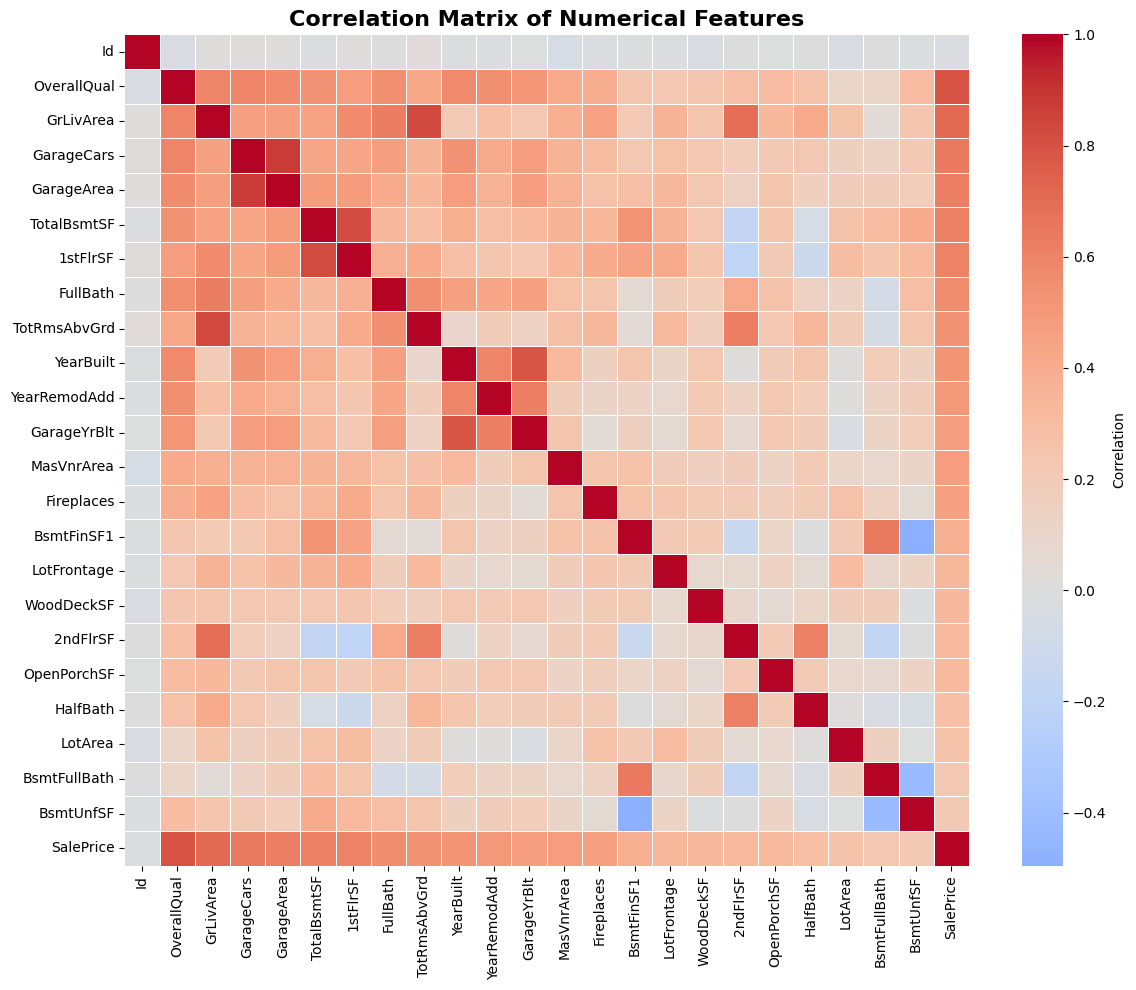


=== Correlación con SalePrice ===

Explicación: La correlación mide la relación lineal entre variables (-1 a 1)
  • Correlación positiva (+): cuando una variable aumenta, la otra también
  • Correlación negativa (-): cuando una variable aumenta, la otra disminuye
  • Cerca de 0: no hay relación lineal

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470178
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtFullBath    0.227122
BsmtUnfSF       0.214479
Id             -0.021917
Name: SalePrice, dtype: float64


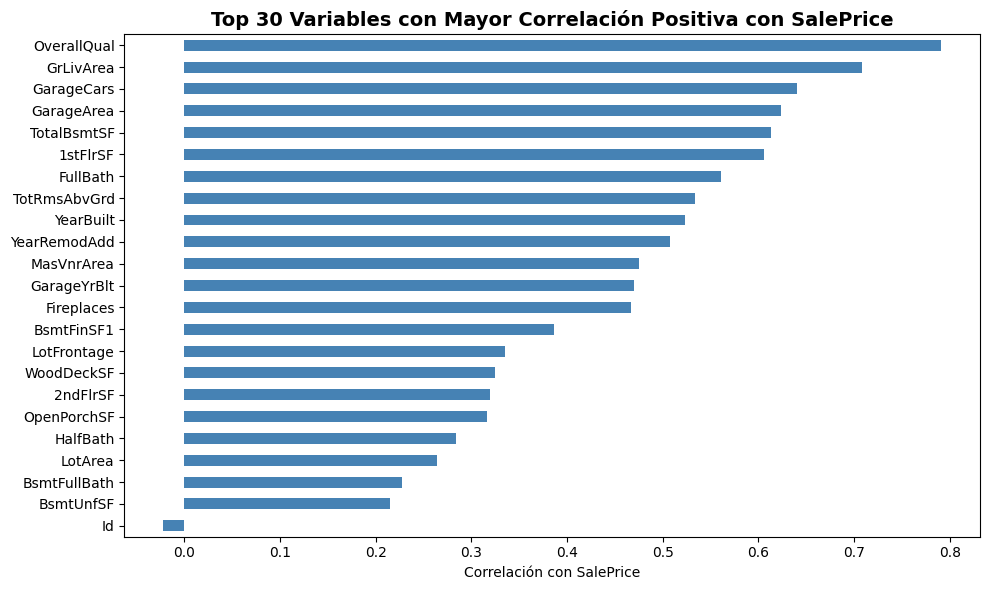

In [24]:
# Visualize correlation matrix for numerical features
correlation_matrix = df_selected.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Numerical Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Show top correlated features with SalePrice
print("\n=== Correlación con SalePrice ===\n")
print("Explicación: La correlación mide la relación lineal entre variables (-1 a 1)")
print("  • Correlación positiva (+): cuando una variable aumenta, la otra también")
print("  • Correlación negativa (-): cuando una variable aumenta, la otra disminuye")
print("  • Cerca de 0: no hay relación lineal\n")

sale_price_corr = df_selected.select_dtypes(include=['int64', 'float64']).corr()['SalePrice'].sort_values(ascending=False)
print(sale_price_corr.head(35))

# Visualize top correlations with SalePrice
top_corr = sale_price_corr[1:31]  # Exclude SalePrice itself
plt.figure(figsize=(10, 6))
top_corr.plot(kind='barh', color='steelblue')
plt.xlabel('Correlación con SalePrice')
plt.title('Top 30 Variables con Mayor Correlación Positiva con SalePrice', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Price distribution
- SalePrice is right-skewed

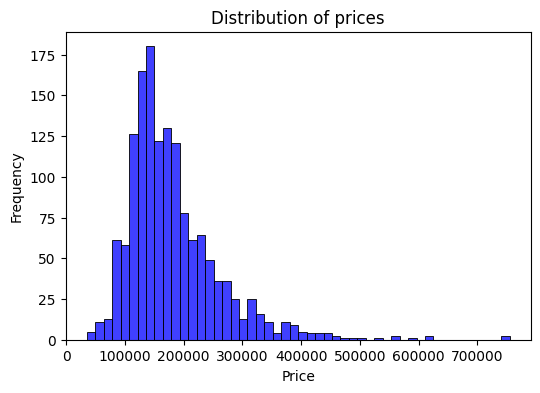

In [25]:
plt.figure(figsize=(6, 4))
sns.histplot(df_selected.SalePrice, bins=50, color='blue')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')
plt.show()

* Attempting to normalize the distribution of the selling price starting from a selling price amount

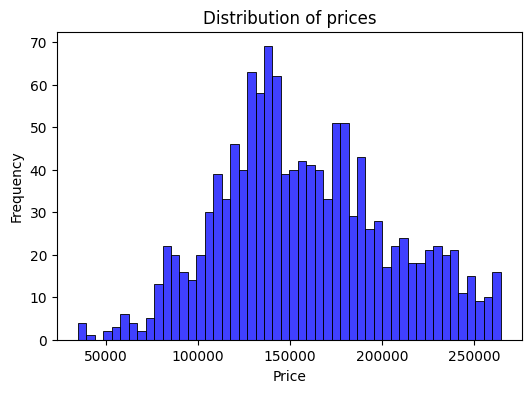

In [26]:
plt.figure(figsize=(6, 4))

sns.histplot(df_selected.SalePrice[df_selected.SalePrice < 265000], bins=50, color='blue')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

Trying to normalize the SalePrice Distribution with log1p
* The log transformation makes the distribution more normal, which is better for many ML models.

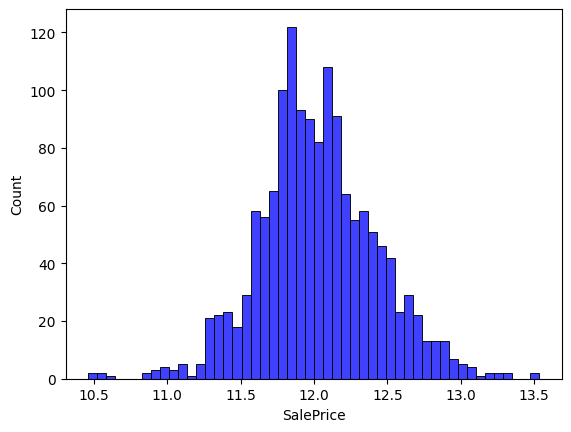

In [27]:
df_selected['SalePrice'] = np.log1p(df_selected['SalePrice'])
y_train = df_selected['SalePrice']
sns.histplot(df_selected['SalePrice'], bins=50, color='blue')
plt.show()

- normalizing columns names

In [28]:
df_selected.columns = df_selected.columns.str.lower().str.replace(' ', '_')
df_selected.columns 


Index(['id', 'overallqual', 'grlivarea', 'garagecars', 'garagearea',
       'totalbsmtsf', '1stflrsf', 'fullbath', 'totrmsabvgrd', 'yearbuilt',
       'yearremodadd', 'garageyrblt', 'masvnrarea', 'fireplaces', 'bsmtfinsf1',
       'lotfrontage', 'wooddecksf', '2ndflrsf', 'openporchsf', 'halfbath',
       'lotarea', 'bsmtfullbath', 'bsmtunfsf', 'saleprice'],
      dtype='object')

In [29]:
df_selected.shape

(1460, 24)

In [30]:
df_selected.head()

,id,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,1stflrsf,fullbath,totrmsabvgrd,yearbuilt,...,bsmtfinsf1,lotfrontage,wooddecksf,2ndflrsf,openporchsf,halfbath,lotarea,bsmtfullbath,bsmtunfsf,saleprice
1459,1,7,1710,2.0,548.0,856.0,856,2,8,2003,...,706.0,65.0,0,854,61,1,8450,1.0,150.0,12.247699
1460,2,6,1262,2.0,460.0,1262.0,1262,2,6,1976,...,978.0,80.0,298,0,0,0,9600,0.0,284.0,12.109016
1461,3,7,1786,2.0,608.0,920.0,920,2,6,2001,...,486.0,68.0,0,866,42,1,11250,1.0,434.0,12.317171
1462,4,7,1717,3.0,642.0,756.0,961,1,7,1915,...,216.0,60.0,0,756,35,0,9550,1.0,540.0,11.849405
1463,5,8,2198,3.0,836.0,1145.0,1145,2,9,2000,...,655.0,84.0,192,1053,84,1,14260,1.0,490.0,12.429220


- rebuild index

In [31]:
# Rebuild index of df_selected
df_selected = df_selected.reset_index(drop=True)

print(f"✓ Index rebuilt")
print(f"✓ New dataframe shape: {df_selected.shape}")
print(f"\nDataframe info:")
df_selected.info()
print(f"\nFirst few rows:")
print(df_selected.head())

✓ Index rebuilt
✓ New dataframe shape: (1460, 24)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1460 non-null   int64  
 1   overallqual   1460 non-null   int64  
 2   grlivarea     1460 non-null   int64  
 3   garagecars    1460 non-null   float64
 4   garagearea    1460 non-null   float64
 5   totalbsmtsf   1460 non-null   float64
 6   1stflrsf      1460 non-null   int64  
 7   fullbath      1460 non-null   int64  
 8   totrmsabvgrd  1460 non-null   int64  
 9   yearbuilt     1460 non-null   int64  
 10  yearremodadd  1460 non-null   int64  
 11  garageyrblt   1460 non-null   float64
 12  masvnrarea    1460 non-null   float64
 13  fireplaces    1460 non-null   int64  
 14  bsmtfinsf1    1460 non-null   float64
 15  lotfrontage   1460 non-null   float64
 16  wooddecksf    1460 non-null   int64  
 17  2ndf

In [32]:
df_selected.head(30)

,id,overallqual,grlivarea,garagecars,garagearea,totalbsmtsf,1stflrsf,fullbath,totrmsabvgrd,yearbuilt,...,bsmtfinsf1,lotfrontage,wooddecksf,2ndflrsf,openporchsf,halfbath,lotarea,bsmtfullbath,bsmtunfsf,saleprice
0,1,7,1710,2.0,548.0,856.0,856,2,8,2003,...,706.0,65.00,0,854,61,1,8450,1.0,150.0,12.247699
1,2,6,1262,2.0,460.0,1262.0,1262,2,6,1976,...,978.0,80.00,298,0,0,0,9600,0.0,284.0,12.109016
2,3,7,1786,2.0,608.0,920.0,920,2,6,2001,...,486.0,68.00,0,866,42,1,11250,1.0,434.0,12.317171
3,4,7,1717,3.0,642.0,756.0,961,1,7,1915,...,216.0,60.00,0,756,35,0,9550,1.0,540.0,11.849405
4,5,8,2198,3.0,836.0,1145.0,1145,2,9,2000,...,655.0,84.00,192,1053,84,1,14260,1.0,490.0,12.429220
5,6,5,1362,2.0,480.0,796.0,796,1,5,1993,...,732.0,85.00,40,566,30,1,14115,1.0,64.0,11.870607
6,7,8,1694,2.0,636.0,1686.0,1694,2,7,2004,...,1369.0,75.00,255,0,57,0,10084,1.0,317.0,12.634606
7,8,7,2090,2.0,484.0,1107.0,1107,2,7,1973,...,859.0,70.05,235,983,204,1,10382,1.0,216.0,12.206078
8,9,7,1774,2.0,468.0,952.0,1022,2,8,1931,...,0.0,51.00,90,752,0,0,6120,0.0,952.0,11.774528
9,10,5,1077,1.0,205.0,991.0,1077,1,5,1939,...,851.0,50.00,0,0,4,0,7420,1.0,140.0,11.678448


* There are many values ​​with 0 and if we add the columns of type Object we would have more to do but as I said, just for simplicity we will get here with the preparation of the data

In [33]:
df_full_train, df_test = train_test_split(df_selected, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

#df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

#y_full_train = df_full_train.SalePrice.values
y_train = df_train.saleprice.values
y_val = df_val.saleprice.values
y_test = df_test.saleprice.values

#del df_full_train['SalePrice']
del df_train['saleprice']
del df_val['saleprice']
del df_test['saleprice']

len(df), len(df_selected), len(df_full_train), len(df_train), len(df_val), len(df_test), len(y_train), len(y_val), len(y_test)    

(2919, 1460, 1168, 876, 292, 292, 876, 292, 292)

* Training..

1. **Linear Regression**
2. **Decision Tree Regressor**
3. **Random Forest Regressor**
4. **XGBoost Regressor**

1. **Linear Regression**

In [34]:
dv = DictVectorizer(sparse=True)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [35]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train)
y_pred_val = lr_model.predict(X_val)

# Calculate RMSE for training and validation sets
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_val = root_mean_squared_error(y_val, y_pred_val)

print("=" * 50)
print("LINEAR REGRESSION MODEL")
print("=" * 50)
print(f"✓ Model trained successfully")
print(f"✓ Validation RMSE: {rmse_val:.4f}")
print(f'✓ Train RMSE: {rmse_train:.2f}')
print("=" * 50)

LINEAR REGRESSION MODEL
✓ Model trained successfully
✓ Validation RMSE: 0.1377
✓ Train RMSE: 0.17


2. **Decision Tree Regressor**

In [36]:
# Train a decision tree regressor
dt = DecisionTreeRegressor(max_depth=2,random_state=1)
dt.fit(X_train, y_train)

# Make predictions
y_pred_train_dt = dt.predict(X_train)
y_pred_val_dt = dt.predict(X_val)

# Calculate RMSE for training and validation sets
rmse_train_dt = root_mean_squared_error(y_train, y_pred_train_dt)
rmse_val_dt = root_mean_squared_error(y_val, y_pred_val_dt)

print("=" * 50)
print("DECISION TREE REGRESSOR MODEL")
print("=" * 50)
print(f"✓ Model trained successfully")
print(f"✓ Validation RMSE: {rmse_val_dt:.4f}")
print(f'✓ Train RMSE: {rmse_train_dt:.2f}')
print("=" * 50)
print("COMPARISON WITH LINEAR REGRESSION")
print("=" * 50)
print("LINEAR REGRESSION MODEL")
print(f"✓ Validation RMSE: {rmse_val:.4f}")
print(f'✓ Train RMSE: {rmse_train:.2f}')
print("=" * 50)
# Print the tree structure
print('\nDecision Tree Structure:')
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

DECISION TREE REGRESSOR MODEL
✓ Model trained successfully
✓ Validation RMSE: 0.2359
✓ Train RMSE: 0.25
COMPARISON WITH LINEAR REGRESSION
LINEAR REGRESSION MODEL
✓ Validation RMSE: 0.1377
✓ Train RMSE: 0.17

Decision Tree Structure:
|--- overallqual <= 6.50
|   |--- grlivarea <= 1379.00
|   |   |--- value: [11.70]
|   |--- grlivarea >  1379.00
|   |   |--- value: [12.00]
|--- overallqual >  6.50
|   |--- overallqual <= 7.50
|   |   |--- value: [12.22]
|   |--- overallqual >  7.50
|   |   |--- value: [12.58]



3. **Random Forest Regressor**

In [44]:
# Train Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1, random_state=1, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred_train_rf = rf_model.predict(X_train)
y_pred_val_rf = rf_model.predict(X_val)


# Calculate RMSE on validation set
rmse_val_rf = root_mean_squared_error(y_val, y_pred_val_rf)
rmse_train_rf = root_mean_squared_error(y_train, y_pred_train_rf)

print("=" * 50)
print("RANDOM FOREST REGRESSOR MODEL")
print("=" * 50)
print(f"✓ Model trained successfully")
print(f"✓ Validation RMSE: {rmse_val_rf:.4f}")
print(f'✓ Train RMSE: {rmse_train_rf:.2f}')
print("=" * 50)
print("COMPARISON WITH OTHERS MODELS")
print("=" * 50)
print("=" * 50)
print("DECISION TREE REGRESSOR MODEL")
print(f"✓ Validation RMSE: {rmse_val_dt:.4f}")
print(f'✓ Train RMSE: {rmse_train_dt:.2f}')
print("=" * 50)
print("LINEAR REGRESSION MODEL")
print(f"✓ Validation RMSE: {rmse_val:.4f}")
print(f'✓ Train RMSE: {rmse_train:.2f}')
print("=" * 50)
# Print the tree structure
print('\nRandom Forest Regressor:')
print(export_text(rf_model.estimators_[0], feature_names=list(dv.get_feature_names_out())))
print("=" * 50)

RANDOM FOREST REGRESSOR MODEL
✓ Model trained successfully
✓ Validation RMSE: 0.2195
✓ Train RMSE: 0.15
COMPARISON WITH OTHERS MODELS
DECISION TREE REGRESSOR MODEL
✓ Validation RMSE: 0.2359
✓ Train RMSE: 0.25
LINEAR REGRESSION MODEL
✓ Validation RMSE: 0.1377
✓ Train RMSE: 0.17

Random Forest Regressor:
|--- overallqual <= 6.50
|   |--- garagearea <= 353.00
|   |   |--- 1stflrsf <= 651.00
|   |   |   |--- overallqual <= 3.50
|   |   |   |   |--- garageyrblt <= 1944.00
|   |   |   |   |   |--- value: [11.00]
|   |   |   |   |--- garageyrblt >  1944.00
|   |   |   |   |   |--- totalbsmtsf <= 540.00
|   |   |   |   |   |   |--- value: [10.47]
|   |   |   |   |   |--- totalbsmtsf >  540.00
|   |   |   |   |   |   |--- value: [10.54]
|   |   |   |--- overallqual >  3.50
|   |   |   |   |--- yearremodadd <= 2003.50
|   |   |   |   |   |--- yearremodadd <= 1970.50
|   |   |   |   |   |   |--- totalbsmtsf <= 260.00
|   |   |   |   |   |   |   |--- value: [10.92]
|   |   |   |   |   |   |--- tot

4. **XGBoost Regressor**

In [45]:
# Train XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=100, random_state=1, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred_val_xgb = xgb_model.predict(X_val)
y_pred_train_xgb = xgb_model.predict(X_train)

# Calculate RMSE on validation set
rmse_val_xgb = root_mean_squared_error(y_val, y_pred_val_xgb)
rmse_train_xgb = root_mean_squared_error(y_train, y_pred_train_xgb)

print("=" * 50)
print("XGBOOST REGRESSOR MODEL")
print("=" * 50)
print(f"✓ Model trained successfully")
print(f"✓ Validation RMSE: {rmse_val_xgb:.4f}")
print(f'✓ Train RMSE: {rmse_train_xgb:.2f}')
print("=" * 50)
print("COMPARISON WITH OTHERS MODELS")
print("=" * 50)
print("RANDOM FOREST REGRESSOR MODEL")
print(f"✓ Validation RMSE: {rmse_val_rf:.4f}")
print(f'✓ Train RMSE: {rmse_train_rf:.2f}')
print("=" * 50)
print("DECISION TREE REGRESSOR MODEL")
print(f"✓ Validation RMSE: {rmse_val_dt:.4f}")
print(f'✓ Train RMSE: {rmse_train_dt:.2f}')
print("=" * 50)
print("LINEAR REGRESSION MODEL")
print(f"✓ Validation RMSE: {rmse_val:.4f}")
print(f'✓ Train RMSE: {rmse_train:.2f}')
print("=" * 50)

XGBOOST REGRESSOR MODEL
✓ Model trained successfully
✓ Validation RMSE: 0.1380
✓ Train RMSE: 0.04
COMPARISON WITH OTHERS MODELS
RANDOM FOREST REGRESSOR MODEL
✓ Validation RMSE: 0.2195
✓ Train RMSE: 0.15
DECISION TREE REGRESSOR MODEL
✓ Validation RMSE: 0.2359
✓ Train RMSE: 0.25
LINEAR REGRESSION MODEL
✓ Validation RMSE: 0.1377
✓ Train RMSE: 0.17


* with  XGBRegressor(n_estimators=5000, max_depth=3, learning_rate=0.01, subsample=0.6, colsample_bytree=0.6, reg_alpha=0.0, reg_lambda=1.0, random_state=42, n_jobs=-1)

In [46]:
# Train XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=5000, max_depth=3, learning_rate=0.01, subsample=0.6, colsample_bytree=0.6, reg_alpha=0.0, reg_lambda=1.0, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred_val_xgb = xgb_model.predict(X_val)
y_pred_train_xgb = xgb_model.predict(X_train)

# Calculate RMSE on validation set
rmse_val_xgb = root_mean_squared_error(y_val, y_pred_val_xgb)
rmse_train_xgb = root_mean_squared_error(y_train, y_pred_train_xgb)

print("=" * 50)
print("XGBOOST REGRESSOR MODEL")
print("=" * 50)
print(f"✓ Model trained successfully")
print(f"✓ Validation RMSE: {rmse_val_xgb:.4f}")
print(f'✓ Train RMSE: {rmse_train_xgb:.2f}')
print("=" * 50)
print("=" * 50)
print("RANDOM FOREST REGRESSOR MODEL")
print(f"✓ Validation RMSE: {rmse_val_rf:.4f}")
print(f'✓ Train RMSE: {rmse_train_rf:.2f}')
print("=" * 50)
print("DECISION TREE REGRESSOR MODEL")
print(f"✓ Validation RMSE: {rmse_val_dt:.4f}")
print(f'✓ Train RMSE: {rmse_train_dt:.2f}')
print("=" * 50)
print("LINEAR REGRESSION MODEL")
print(f"✓ Validation RMSE: {rmse_val:.4f}")
print(f'✓ Train RMSE: {rmse_train:.2f}')
print("=" * 50)

XGBOOST REGRESSOR MODEL
✓ Model trained successfully
✓ Validation RMSE: 0.1272
✓ Train RMSE: 0.04
RANDOM FOREST REGRESSOR MODEL
✓ Validation RMSE: 0.2195
✓ Train RMSE: 0.15
DECISION TREE REGRESSOR MODEL
✓ Validation RMSE: 0.2359
✓ Train RMSE: 0.25
LINEAR REGRESSION MODEL
✓ Validation RMSE: 0.1377
✓ Train RMSE: 0.17


n_estimators=10, RMSE=0.150577
n_estimators=20, RMSE=0.144318
n_estimators=30, RMSE=0.143749
n_estimators=40, RMSE=0.143725
n_estimators=50, RMSE=0.142690
n_estimators=60, RMSE=0.141825
n_estimators=70, RMSE=0.141322
n_estimators=80, RMSE=0.141685
n_estimators=90, RMSE=0.142186
n_estimators=100, RMSE=0.142388
n_estimators=110, RMSE=0.142319
n_estimators=120, RMSE=0.142005
n_estimators=130, RMSE=0.141433
n_estimators=140, RMSE=0.141238
n_estimators=150, RMSE=0.141459
n_estimators=160, RMSE=0.141429
n_estimators=170, RMSE=0.141364
n_estimators=180, RMSE=0.141395
n_estimators=190, RMSE=0.141464
n_estimators=200, RMSE=0.141312

RMSE stops improving after n_estimators = 20


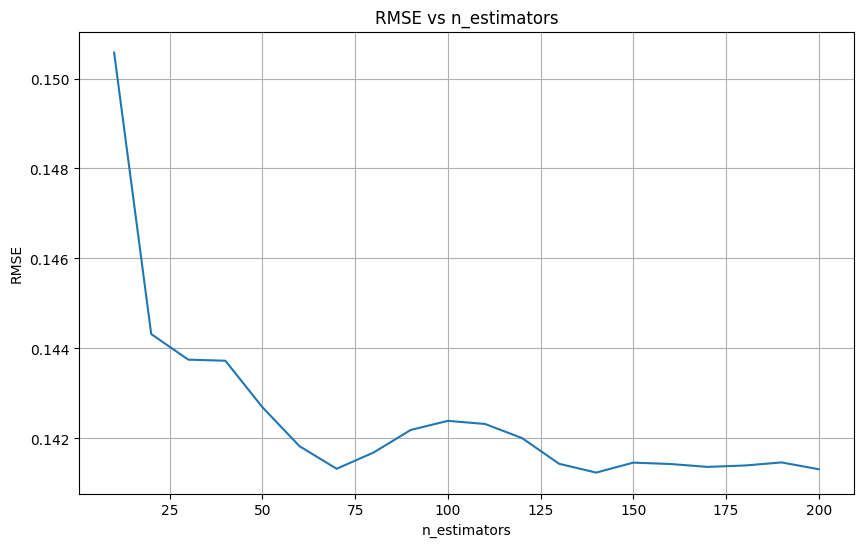

In [47]:

n_estimators_values = range(10, 201, 10)
rmse_scores = []

for n_est in n_estimators_values:
    # Train model
    rf = RandomForestRegressor(n_estimators=n_est, random_state=1)
    rf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf.predict(X_val)
    
    # Calculate RMSE
    rmse = root_mean_squared_error(y_val, y_pred)
    rmse_scores.append(rmse)
    
    print(f'n_estimators={n_est}, RMSE={rmse:.6f}')

# Find where RMSE stops improving (up to 3 decimal places)
rmse_rounded = np.round(rmse_scores, 3)
for i in range(1, len(rmse_rounded)):
    if rmse_rounded[i] == rmse_rounded[i-1]:
        print(f'\nRMSE stops improving after n_estimators = {n_estimators_values[i-1]}')
        break

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, rmse_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators')
plt.grid(True)

plt.show()

max_depth=10, mean RMSE=0.143983
max_depth=15, mean RMSE=0.142379
max_depth=20, mean RMSE=0.142490
max_depth=25, mean RMSE=0.142494


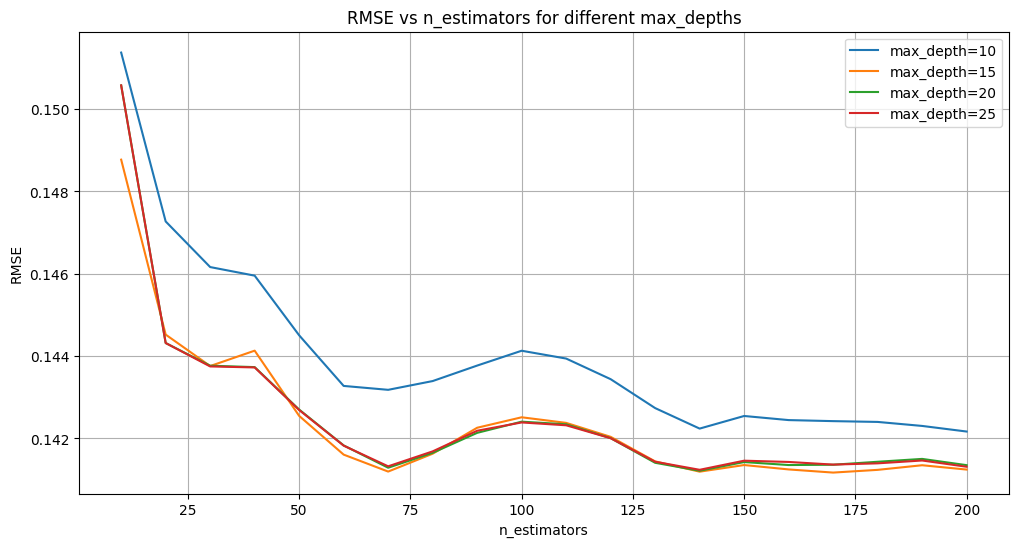

In [48]:
# Define parameters
max_depths = [10, 15, 20, 25]
n_estimators_range = range(10, 210, 10)

# Dictionary to store results
results = {depth: [] for depth in max_depths}

# Train and evaluate models
for depth in max_depths:
    for n_est in n_estimators_range:
        # Train model
        rf = RandomForestRegressor(
            max_depth=depth,
            n_estimators=n_est,
            random_state=1
        )
        rf.fit(X_train, y_train)
        
        # Make predictions and calculate RMSE
        y_pred = rf.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        results[depth].append(rmse)
    
    print(f'max_depth={depth}, mean RMSE={np.mean(results[depth]):.6f}')

# Plot results
plt.figure(figsize=(12, 6))
for depth in max_depths:
    plt.plot(n_estimators_range, results[depth], label=f'max_depth={depth}')
plt.xlabel('n_estimators')
plt.ylabel('RMSE')
plt.title('RMSE vs n_estimators for different max_depths')
plt.legend()
plt.grid(True)
plt.show()